In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train=pd.read_csv("./MNIST_train.csv")

In [ ]:
train

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,59995,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,59996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,59997,59997,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,59998,59998,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train = train.drop("Unnamed: 0",axis=1)
train = train.drop("index",axis=1)

In [ ]:
train.head()

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test=pd.read_csv("./MNIST_test.csv")


In [ ]:
test

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,9996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,9997,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,9998,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test = test.drop("Unnamed: 0",axis=1)
test = test.drop("index",axis=1)

In [ ]:
X_train=train.drop("labels",axis=1)
Y_train=train["labels"]

In [ ]:
x_test=test.drop("labels",axis=1)
y_test=test["labels"]

In [ ]:
X_train_nor=X_train/255.0
x_test_nor=x_test/255.0

In [ ]:
print(X_train_nor.shape)

(60000, 784)


In [ ]:
print(x_test_nor.shape)

(10000, 784)


In [ ]:
print(Y_train.shape)

(60000,)


In [ ]:
print(y_test.shape)

(10000,)


#Naive bayes

In [ ]:
from scipy.stats import multivariate_normal as mvn
class GaussNB():
  def fit(self, X_train_nor, Y_train, epsilon=1e-1):
    X_train_nor = np.array(X_train_nor)
    Y_train = np.array(Y_train)
    self.likelihoods = dict()
    self.priors = dict()
    self.K = set(Y_train.astype(int))
    for k in self.K:
      X_k = X_train_nor[Y_train == k, :]
      self.likelihoods[k] = {"mean": X_k.mean(axis=0),"cov": X_k.var(axis=0) + epsilon}
      self.priors[k] = len(X_k) / len(X_train_nor)

  def predict(self, x_test_nor):
    N, D = x_test_nor.shape
    P_hat = np.zeros((N, len(self.K)))
    for k, l in self.likelihoods.items():
      P_hat[:, k] = mvn.logpdf(x_test_nor, l["mean"], l["cov"]) + np.log(self.priors[k])
    return P_hat.argmax(axis=1)


In [ ]:
def accuracy(y_test, y_pred):
    return np.mean(y_test == y_pred)


In [ ]:
gnb = GaussNB()
gnb.fit(X_train_nor, Y_train)


In [ ]:
y_pred = gnb.predict(x_test_nor)


In [ ]:
accuracy(y_test, y_pred)


np.float64(0.7791)

#NON-Naive Bayes

In [ ]:
class GaussBayes():
  def fit(self, X_train_nor, Y_train, epsilon=1e-1):
    self.likelihoods = dict()
    self.priors = dict()
    self.classes = set(Y_train.astype(int))

    X_train_nor = np.array(X_train_nor)
    Y_train = np.array(Y_train)

    for cls in self.classes:
      X_cls = X_train_nor[Y_train == cls, :]
      N_k, D = X_cls.shape
      mu_k = X_cls.mean(axis=0)
      cov_k = (1 / (N_k - 1)) * np.matmul((X_cls - mu_k).T, (X_cls - mu_k)) + epsilon * np.identity(D)
      self.likelihoods[cls] = {"mean": mu_k, "cov": cov_k}
      self.priors[cls] = len(X_cls) / len(X_train_nor)

  def predict(self, x_test_nor):
    x_test_nor = np.array(x_test_nor)
    N, D = x_test_nor.shape
    P_hat = np.zeros((N, len(self.classes)))

    for idx, cls in enumerate(self.classes):
      l = self.likelihoods[cls]
      P_hat[:, idx] = mvn.logpdf(x_test_nor, l["mean"], l["cov"]) + np.log(self.priors[cls])

    return np.array(list(self.classes))[P_hat.argmax(axis=1)]



In [ ]:

gaussb = GaussBayes()
gaussb.fit(X_train_nor, Y_train)


In [ ]:
y_pred = gaussb.predict(x_test_nor)


In [ ]:
def accuracy(y_test, y_pred):
    return np.mean(y_test == y_pred)


In [ ]:
accuracy(y_test,y_pred)

np.float64(0.9542)

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
ALL = pd.read_csv('./MNIST_train.csv')  # Change path if needed
ALL = np.array(ALL)



In [ ]:
print(ALL.shape)


(60000, 787)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt




y = ALL[:, 1]


X = ALL[:, 2:786]


print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (60000, 784)
y shape: (60000,)


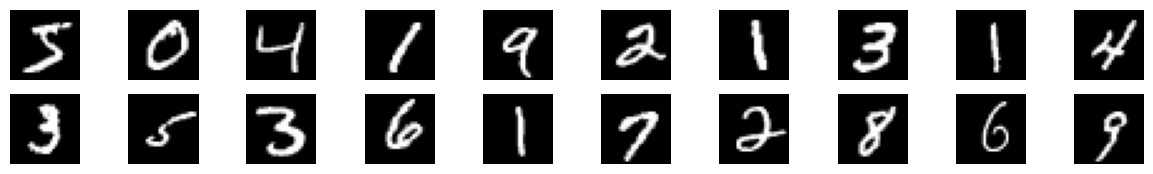

In [ ]:
import matplotlib.pyplot as plt

# Plot first 20 digits (or change range for more)
num_images = 20
plt.figure(figsize=(15, 2))

for i in range(num_images):
    plt.subplot(2, 10, i+1)
    img = X[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.show()


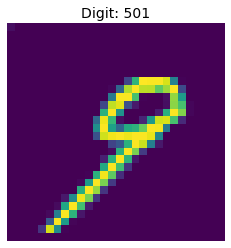

In [ ]:
import matplotlib.pyplot as plt

index = 501  # or any digit index you want

# Extract image and label
X_test = X[index]
X_test_reshape = X_test.reshape(28, 28)
label = int(y[index])

# Plot with a heatmap style and label
plt.imshow(X_test_reshape, cmap='viridis')  # You can also try 'plasma', 'hot', etc.
plt.title(f"Digit: {label}", fontsize=14)
plt.axis('off')
plt.show()


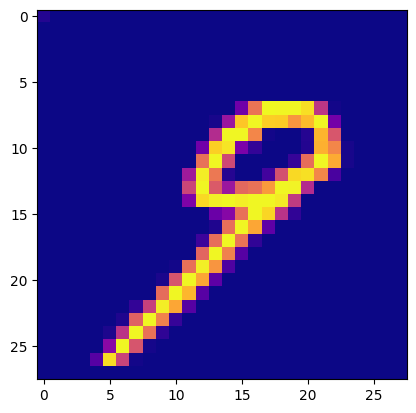

In [ ]:
plt.imshow(X_test_reshape, cmap='plasma')
